Linear regression is the most popular regression model with very simple math concepts behind it. It's mostly applicable where the relation between features and a target vector can be explained linearly.
<br/><br/>
Heuristics, i.e. "shortcuts" that would allow faster and more reliable inference, that are needed to be taken into account when applying this model are:
* **Linear assumption**: data should already be linearly dependent. We can always apply different transformations to introduce linearity.
* **Collinearity assumption**: there's little to no colleration between input features.
* **Normal assumption**: all variables should follow a normal or a close-to-normal distribution. This should ensure more reliable predictions of the regression model.
* **Rescaling data**: extreme variables should be rescaled, but it's not necessarily a linear regression's assumption, since it's a common step in data preprocessing for any model or task.
<br/><br/>

Simpliest case of a regression model is univariate (consisting of only one feature) linear regression $Y=\beta X + \epsilon$:
$$
\left[\begin{array}{c}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{array}\right]=\left[\begin{array}{cc}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_n
\end{array}\right]\left[\begin{array}{l}
\beta_0 \\
\beta_1
\end{array}\right]+\left[\begin{array}{c}
\epsilon_1 \\
\epsilon_2 \\
\vdots \\
\epsilon_n
\end{array}\right]
$$
The optimization problem is centered around finding $\beta_0$ and $\beta_1$ that minimize Sum of Squared Errors (**SSE**) (we denote it as $C$) and is called Ordinary Least Squares (**OLS**): 
$$
C=\left(\beta_0+\beta_1 x_1-y_1\right)^2+\left(\beta_0+\beta_1 x_2-y_2\right)^2+\ldots+\left(\beta_0+\beta_1 x_n-y_n\right)^2
$$
We then take a partial derivatives with respect to $\beta_0$ and $\beta_1$. $\frac{d(SSE)}{d\beta_0}=\sum\epsilon_i=0$, therefore with the best $\beta_0$ residuals are always equal to 0, therefore we can express this in an equation: $\sum y_i=N\times\beta_0+\beta_1\times\sum x_i\quad [1]$. Since this is a quadratic optimization, the extreme value of $C$ will be at its minimum. The partial derivative with respect to $\beta_1$ will be equal to:
$$
\begin{gathered}
\sum y_i=n \beta_0+\beta_1 \sum x_i \\
\sum x_i y_i=\sum x_i \beta_0+\beta_1 \sum x_i^2\quad\text{[2]}
\end{gathered}  
$$ 
Then we can find $\beta_0$ and $\beta_1$ by solving a system of equations $[1]$ and $[2]$. To make the problem more optimal we can rewrite the system of linear equations consisting of $[1]$ and $[2]$ as $X'Y=X'XB$, where:
$$
\begin{gathered}
X^{\prime} X=\left[\begin{array}{cccc}
1 & 1 & \cdots & 1 \\
x_1 & x_2 & \cdots & x_n
\end{array}\right]\left[\begin{array}{cc}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_n
\end{array}\right]=\left[\begin{array}{cc}
n & \sum x_i \\
\sum x_i & \sum x_i^2
\end{array}\right] \\
X^{\prime} Y=\left[\begin{array}{cccc}
1 & 1 & \cdots & 1 \\
x_1 & x_2 & \cdots & x_n
\end{array}\right]\left[\begin{array}{c}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{array}\right]=\left[\begin{array}{c}
\sum y_i \\
\sum x_i y_i
\end{array}\right]
\end{gathered}
$$
Given this matrix form of the regression equation we can find the vector $B=(\beta_0, \beta_1)$:
$$
\begin{gathered}
    B=(XX^{\prime})^{(-1)}X^{\prime}Y
\end{gathered}
$$
Now we can apply this theory to real data. For this example a popular "diabetes" dataset from `scikit-learn` has been chosen. We'll load the data, calculate matrix $B$ and build a simple univariate linear regression function: 

In [1]:
from sklearn import datasets
import numpy as np
import plotly.graph_objects as go

# load a popular "diabetes" dataset and select only one feature
# to reduce it to univariate linear regression problem
X, Y = datasets.load_diabetes(return_X_y=True)
X = X[:, 2]
intercept = np.ones((X.shape[0],)) # vector for beta_0
X = np.vstack([intercept, X]).T
X_prime = X.T # X'

# find coefficients of the univariate linear regression
# by finding the extreme point of the gradient, i.e.
# minimum for the SSE function, and pass them next as 
# parameters into a linear function linear_reg_func
B = np.linalg.inv(X_prime @ X) @ X_prime @ Y
linear_reg_func = lambda x: B[0] + B[1]*x

fig = go.Figure()
fig.add_trace(
    go.Scatter(x=X[:,1], y=Y,
        mode='markers',
        name='Diabetes dataset'
    )
)
fig.add_trace(
    go.Scatter(x=X[:,1], y=linear_reg_func(X[:,1]),
        mode='lines',
        line=go.scatter.Line(color='red'),
        name='Linear regression function'
    )
)
fig.show()

The core problem behind this approach to building a univariate linear regression model is that we need to store additional matrices $X^{\prime}$ and $B$. With larger datasets and more dimensions this can become a big computational problem. This is why it's preferable to use gradient descend in order to find $\beta_0$ and $\beta_1$.
<br/><br/>
First we identify a **cost function**, which is a broader term that includes a loss function and applies itself to all data points sumultaniously. For linear regression it's an average of SSE - Mean Squared Error (**MSE**): $L(\beta)=\frac{1}{N}\sum_{i=0}^N[y_i-(\beta_0+\beta_1 x)]^2$. The **loss function** will define the penalty on each data point. For linear regression it's **square loss**: $(\hat{y}-y)^2$. The key idea of the gradient descend here is minimizing the cost function by adjusting parameters towards the gradient $\nabla L$ and correcting the descend by some parameter $lr$, that would define a rate of change and allow to better deal with local minima and maxima. Thus, explaining it in mathematical terms: 
$$
\begin{gathered}
\Delta B \text{(change of B)} = lr\times (-\nabla L)
\end{gathered}
$$
<br/><br/>
Before calculating a gradient, it's important to highlight a slight change in a cost function: $L(\beta)=\frac{1}{2N}\sum_{i=0}^N[y_i-(\beta_0+\beta_1 x)]^2$. Now we divide by $2N$ instead of $N$. We do this just for the sake of convenience when calculating derivatives. Since it's just a constant, it will not affect the gradient. Now if we take partial derivates of $L$ with respect to $\beta_0$ and $\beta_1$ we'll have:
$$
\begin{gathered}
\frac{d L}{d \beta_0}=\frac{1}{n} \sum_{i=1}^n\left(\left(\beta_0+\beta_1 x_i\right)-y_i\right) \\
\frac{d L}{d \beta_1}=\frac{1}{n} \sum_{i=1}^n\left(\left(\beta_0+\beta_1 x_i\right)-y_i\right) x_i
\end{gathered}
$$

Another important trick that is used in regression models is regularization. It adds additional correction to weights, that creates penalties for exploding gradients. This can significantly improve quality of the model and prevent overfitting, i.e. biased behaviour of the model towards some features or specific set of data. There are several regularization techniques that can be used:
* $L1$ regularization, i.e. **Lasso Regression**
> To the cost function $L$ we add another term which is $\lambda\times\sum_{j=1}^p|\beta_j|$. When we take partial derivatives, the $\frac{d L}{d \beta_0}$ won't change, however this will change $\frac{d L}{d \beta_1}=\frac{d L}{d \beta_1}+\lambda\times sign(\beta_1)$. Therefore we go into the direction of $0$ for each weight. There's also $\lambda$ that specifies the importance of the regularization term. 
* $L2$ regularization, i.e. **Ridge Regression**
> Now we add to cost function the following term: $\lambda\times\sum_{j=1}^p[\beta_j]^2$. The derivative with respect to $\beta_1$ now will be equal to $\frac{d L}{d \beta_1}=\frac{d L}{d \beta_1}+2\lambda\beta_1$, which will result in a total correction for $\beta_1$ be equal to: $\beta_1^{[t]}=\beta_{1}^{[t-1]} - lr\times\lambda \beta_1^{[t-1]}-lr\times\frac{d L}{d \beta_1}$. 
* **ElasticNet Regression**
>This combines both $L1$ and $L2$ regularization techniques and adds to cost function the following term: $\lambda \rho * \sum_{j=1}^m\left|\hat{\beta}_j\right|+\lambda(1-\rho) * \sum_{j=1}^m \hat{\beta}_j^2$. Now we have an additional parameter $\rho\in[0; 1]$ that determines whether we want to use specific regularization term or a mix of both. The gradient will be a combination of two previous ones, but with additional new constants containing $\rho$.

Experimentally it is proven that both too low and too high values of parameter $\lambda$ present in all regularization techniques won't have a positive effect on the model, which can be seen on the graph depicting relation between $Var(Y)$ and $\lambda$ taken from [this medium article](https://medium.com/@shiny_jay/ml-how-to-choose-lambda-9d0000c1491c):

![lambda vs var](media/regLambda_vs_variance.png "Lambda VS Variance")

In [59]:
import matplotlib.pyplot as plt

class LinearRegression:

    def __init__(self):
        self.losses = []
        self.sse = []
        self.B = []

    def mseCost(self, y, yHat):
        return ((yHat - y)**2).mean()

    def sseCost(self, y, yHat):
        return ((yHat - y)**2).sum()

    def predict(self, X):
        intercept = np.ones((X.shape[0],))
        X = np.vstack([intercept, X]).T
        return np.dot(X, self.B)

    def fit(self, X:np.ndarray, y:np.ndarray, 
            lr: float = .001, lam: float= None, rho: float = None, 
            epochs: int = 1000, reg: str = None, verbose: int = 100):
        """
            lr: float
                - learning rate
            lam: float
                - lambda parameter of the regularization
            rho: float
                - rho parameter of the regularization
            epochs: int
                - number of training epochs
            reg: "l1", "l2", "elastic" or None
                - type of regularization that needs to be applied
            verbose: int
                - output MSE and SSE every "verbose" epoch
        """
        self.B = np.array([1., 1.])
        intercept = np.ones((X.shape[0],))
        X = np.vstack([intercept, X]).T

        for epoch in range(epochs+1):
            yHat = np.dot(X, self.B)
            residuals = yHat - y

            gradient = np.array([
                residuals.mean(),
                np.dot(residuals, X).mean(),
            ], dtype=np.float64)
            self.B -= lr * gradient

            self.losses.append(self.mseCost(y, yHat))
            self.sse.append(self.sseCost(y, yHat))

            if epoch % verbose == 0:
                print(f'Epoch {epoch} :: MSE {self.losses[-1]} :: SSE {self.sse[-1]}')

In [54]:
from sklearn.model_selection import train_test_split

X, Y = datasets.load_diabetes(return_X_y=True)
X = X[:, 2]
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=.75)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

list(map(lambda x: x.shape, [X_train, X_test, y_train, y_test]))

[(331,), (111,), (331, 1), (111, 1)]

In [64]:
linearReg = LinearRegression()
linearReg.fit(X_train, y_train, epochs=10_000, verbose=1000)

Epoch 0 :: MSE 29139.15866000848 :: SSE 3192515361.949189
Epoch 1000 :: MSE 333151.26719965 :: SSE 36500385985.66085
Epoch 2000 :: MSE 336693.5753976016 :: SSE 36888484814.13663
Epoch 3000 :: MSE 224850.17307079164 :: SSE 24634809811.809002
Epoch 4000 :: MSE 134795.11538276385 :: SSE 14768287636.45099
Epoch 5000 :: MSE 78927.19753158162 :: SSE 8647342688.757614
Epoch 6000 :: MSE 46734.7567744468 :: SSE 5120306686.965166
Epoch 7000 :: MSE 28631.44056937574 :: SSE 3136889260.2213755
Epoch 8000 :: MSE 18536.45610944262 :: SSE 2030872667.806643
Epoch 9000 :: MSE 12923.765441008365 :: SSE 1415940665.4823174
Epoch 10000 :: MSE 9806.421495265515 :: SSE 1074401345.442785


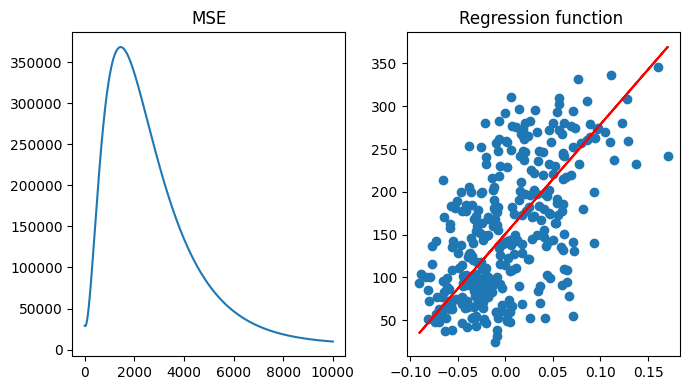

In [68]:
fig, axs = plt.subplots(1, 2, figsize=(7, 4))
axs[0].plot(linearReg.losses)
axs[0].set(title='MSE')
axs[1].plot(X_train, linearReg.predict(X_train).reshape(1,-1)[0], c='red')
axs[1].scatter(X_train, y_train)
axs[1].set(title='Regression function ')
fig.tight_layout()